## Visualizing the dataset diversity

In [ ]:
# open the data/*.json files and measure the depth of the ax_tree_text tree and the length of the ax_tree_text tree
import json
import pathlib
import pprint

def measure_tree_depth(tree):

    # max unbroken string of tab whitespace characters
    max_depth = 0
    current_depth = 0
    for c in tree:
        if c == '\t':
            current_depth += 1
        else:
            if current_depth > max_depth:
                max_depth = current_depth
            current_depth = 0
    return max_depth


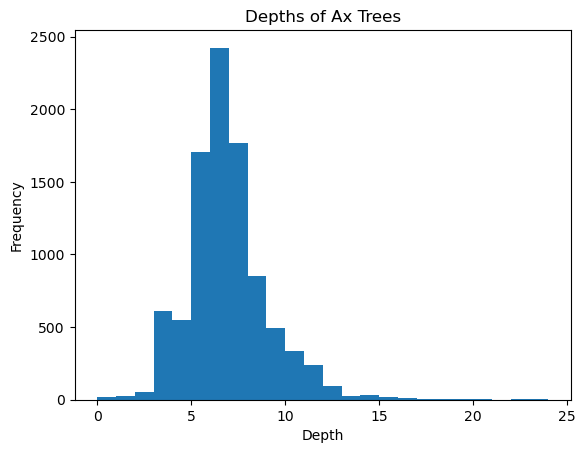

In [7]:
# make a histogram of the depths of all the axtree_txt trees in the data/*.json files
import matplotlib.pyplot as plt
import os

depths = []
lengths = []
link_counts = []
img_counts = []
paths = pathlib.Path("data").rglob("*.json")
for path in paths:
    with open(path) as f:
        data = json.load(f)
        depths.append(measure_tree_depth(data["axtree_txt"]))
        lengths.append(len(data["axtree_txt"]))
        link_counts.append(data["axtree_txt"].count("link"))
        img_counts.append(data["axtree_txt"].count("img"))


plt.hist(depths, bins=range(0, 25))
plt.xlabel("Depth")
plt.ylabel("Frequency")
plt.title("Depths of Ax Trees")
plt.show()

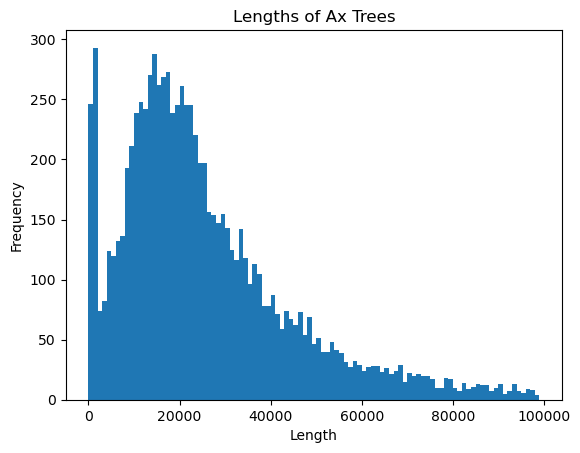

In [3]:
plt.hist(lengths, bins=range(0, 100_000, 1000))
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Lengths of Ax Trees")
plt.show()

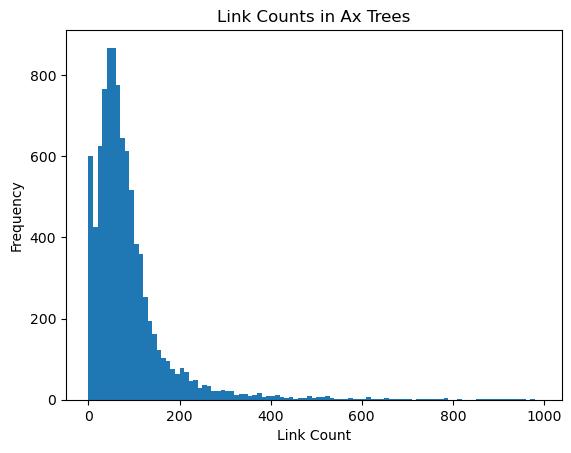

In [8]:
plt.hist(link_counts, bins=range(0, 1000, 10))
plt.xlabel("Link Count")
plt.ylabel("Frequency")
plt.title("Link Counts in Ax Trees")
plt.show()

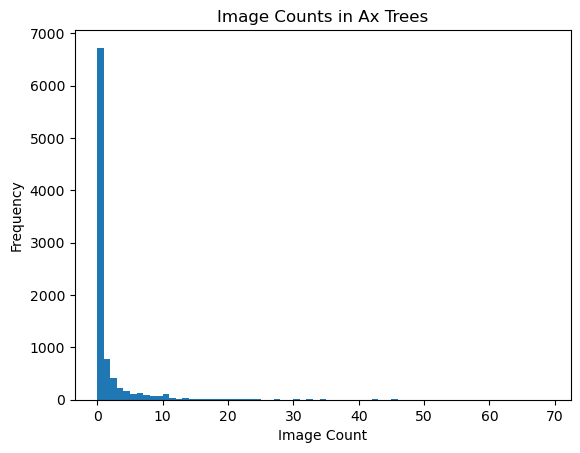

In [15]:
plt.hist(img_counts, bins=range(0, 70, 1))
plt.xlabel("Image Count")
plt.ylabel("Frequency")
plt.title("Image Counts in Ax Trees")
plt.show()

0
             Count
Type              
article       4823
shopping       534
forum          307
video          282
login          213
website        187
webpage        165
blog           130
app            116
event          108
recipe          96
guide           75
social          66
podcast         64
page            64
homepage        61
game            54
book            49
profile         48
events          45
gallery         42
education       33
course          33
tutorial        26
tool            25
games           24
museum          24
program         23
quiz            23
resource        22
restaurant      22
error           22
courses         22
music           21
question        20
service         20
community       19
festival        18
exhibition      17
library         17
recipes         17
nonprofit       16
resources       16
tourism         16
post            15
university      15
government      14
software        14
application     14
workshop        14


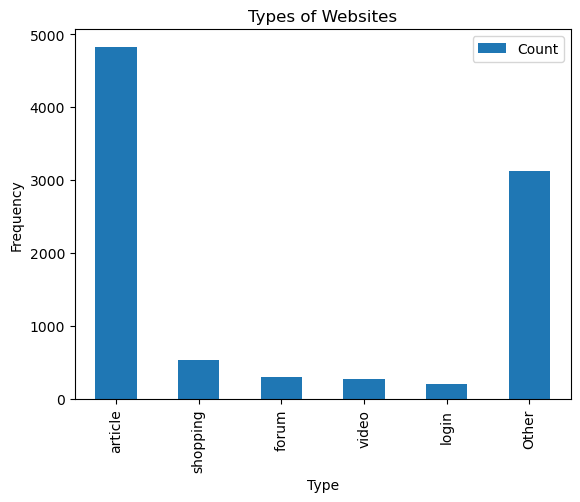

               Count
Genre               
education       5707
entertainment    901
travel           319
social           225
news             215


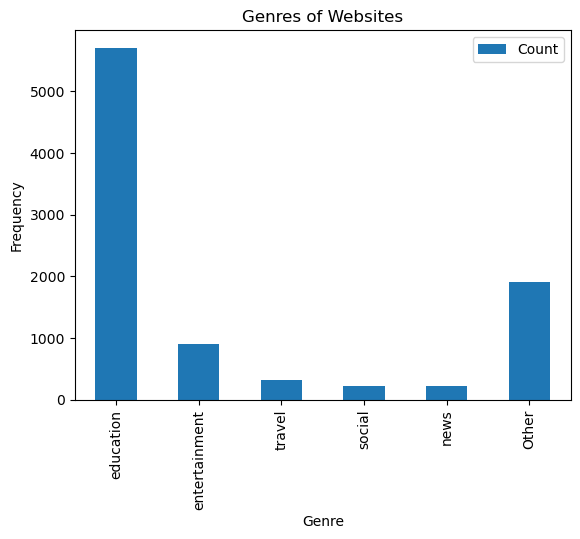

             Count
Topic             
art            181
music          167
photography    162
gardening      128
history        119


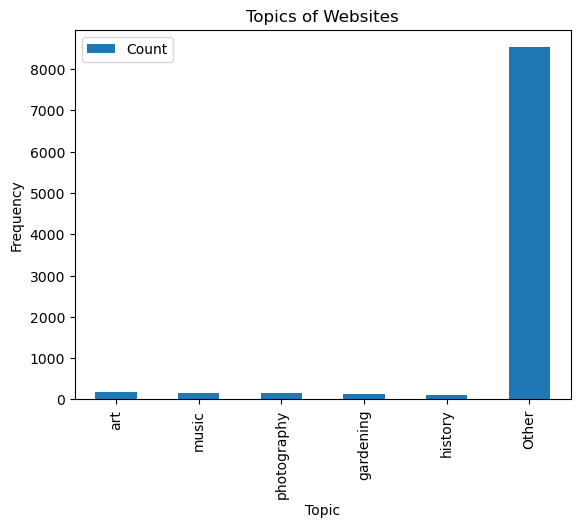

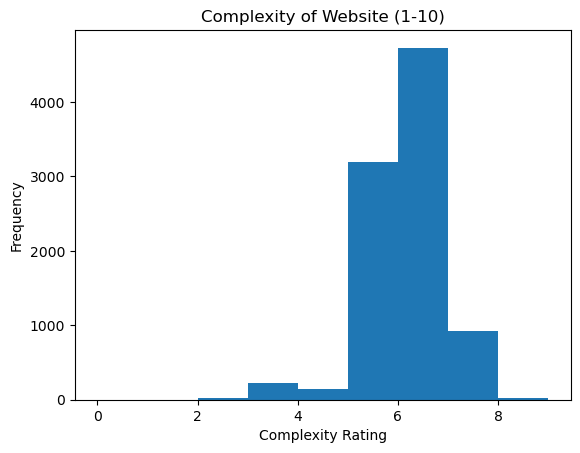

In [6]:
import pandas as pd
import json
import pathlib

# Sample data (replace with your data)
types = []
complexities = []
genres = []
topics = []
paths = list(pathlib.Path("data").rglob("*.json"))
errs = 0
for path in paths:
    with open(path, 'r') as f:
        data = json.load(f)
        try:
            types.append(data["type"])
            complexities.append(int(data["complexity"]))
            genres.append(data["genre"])
            topics.append(data["topic"])
        except:
            # print("Error in file: ", path)
            errs += 1

print(errs)
# with open("missing_files.json", "w") as f:
#     json.dump(errs, f)

type_df = pd.DataFrame(types, columns=['Type'])
count_table = type_df['Type'].value_counts().reset_index()
count_table.columns = ['Type', 'Count']
count_table.set_index('Type', inplace=True)
pprint.pp(count_table.head(50))
# turn the top 5 into a bar chart and categorize the rest as "Other"
count_table = count_table.head(5)
count_table.loc['Other'] = [type_df.shape[0] - count_table['Count'].sum()]
count_table.plot(kind='bar')
plt.xlabel("Type")
plt.ylabel("Frequency")
plt.title("Types of Websites")
plt.show()

genre_df = pd.DataFrame(genres, columns=['Genre'])
count_table = genre_df['Genre'].value_counts().reset_index()
count_table.columns = ['Genre', 'Count']
count_table.set_index('Genre', inplace=True)
pprint.pp(count_table.head(5))
count_table = count_table.head(5)
count_table.loc['Other'] = [genre_df.shape[0] - count_table['Count'].sum()]
count_table.plot(kind='bar')
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.title("Genres of Websites")
plt.show()

topic_df = pd.DataFrame(topics, columns=['Topic'])
count_table = topic_df['Topic'].value_counts().reset_index()
count_table.columns = ['Topic', 'Count']
count_table.set_index('Topic', inplace=True)
pprint.pp(count_table.head(5))
count_table = count_table.head(5)
count_table.loc['Other'] = [topic_df.shape[0] - count_table['Count'].sum()]
count_table.plot(kind='bar')
plt.xlabel("Topic")
plt.ylabel("Frequency")
plt.title("Topics of Websites")
plt.show()

plt.hist(complexities, bins=range(0, 10))
plt.xlabel("Complexity Rating")
plt.ylabel("Frequency")
plt.title("Complexity of Website (1-10)")
plt.show()